In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
for x, y in training_set:
    print("Batch of images shape:", x.shape)
    print("Batch of labels shape:", y.shape)
    break  # This will stop after the first batch

Batch of images shape: (32, 128, 128, 3)
Batch of labels shape: (32, 38)


In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [13]:
cnn = tf.keras.models.Sequential()

In [15]:
# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))  # Corrected MaxPool2D to MaxPooling2D

In [17]:
# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))  # Corrected MaxPool2D to MaxPooling2D

In [19]:
# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))  # Ensure MaxPooling2D is used

In [21]:
# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))  # Ensure MaxPooling2D is used

In [23]:
# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))  # Ensure MaxPooling2D is used

In [25]:
# Add Dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten the output from the convolutional layers
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

# Add Dropout layer to avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.4))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

In [27]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Display the model summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [29]:
# Fit the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 9282s 4s/step - loss: 1.3460 - accuracy: 0.6043 - val_loss: 0.5186 - val_accuracy: 0.8389
Epoch 2/10
2197/2197 [==============================] - 1988s 905ms/step - loss: 0.4487 - accuracy: 0.8568 - val_loss: 0.2729 - val_accuracy: 0.9121
Epoch 3/10
2197/2197 [==============================] - 1992s 907ms/step - loss: 0.2664 - accuracy: 0.9141 - val_loss: 0.2069 - val_accuracy: 0.9356
Epoch 4/10
2197/2197 [==============================] - 3076s 1s/step - loss: 0.1879 - accuracy: 0.9382 - val_loss: 0.1867 - val_accuracy: 0.9414
Epoch 5/10
2197/2197 [==============================] - 1979s 901ms/step - loss: 0.1370 - accuracy: 0.9547 - val_loss: 0.2389 - val_accuracy: 0.9293
Epoch 6/10
2197/2197 [==============================] - 2128s 968ms/step - loss: 0.1083 - accuracy: 0.9643 - val_loss: 0.1024 - val_accuracy: 0.9669
Epoch 7/10
2197/2197 [==============================] - 2210s 1s/step - loss: 0.0898 - accuracy: 0.9707 - val_lo

In [31]:
# Evaluate the model on the training set
train_loss, train_acc = cnn.evaluate(training_set)

# Print the training accuracy
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 511s 232ms/step - loss: 0.0216 - accuracy: 0.9935
Training accuracy: 0.9934703707695007


In [33]:
# Evaluate the model on the validation set
val_loss, val_acc = cnn.evaluate(validation_set)

# Print the validation accuracy
print('Validation accuracy:', val_acc)

550/550 [==============================] - 128s 233ms/step - loss: 0.1005 - accuracy: 0.9684
Validation accuracy: 0.9683587551116943


In [85]:
cnn.save('trained_plant_disease_model.h5')

In [79]:
# Save the trained model
cnn.save('trained_plant_disease_model.keras')

In [37]:
# Access the training history
history_dict = training_history.history

# Print the training history
print(history_dict)

{'loss': [1.3459941148757935, 0.44869664311408997, 0.26642581820487976, 0.1879294514656067, 0.13696222007274628, 0.10830337554216385, 0.08975742757320404, 0.07347758114337921, 0.06511329114437103, 0.051950421184301376], 'accuracy': [0.6042677164077759, 0.8567750453948975, 0.9141190648078918, 0.9381605982780457, 0.9547336101531982, 0.9643075466156006, 0.9707375764846802, 0.975986897945404, 0.979244589805603, 0.9828437566757202], 'val_loss': [0.5185821652412415, 0.27287954092025757, 0.2069198489189148, 0.18670377135276794, 0.2389000803232193, 0.1024000272154808, 0.13617466390132904, 0.1081063374876976, 0.11764800548553467, 0.10046973824501038], 'val_accuracy': [0.8388914465904236, 0.9120760560035706, 0.9356362223625183, 0.9413840174674988, 0.9292624592781067, 0.96687912940979, 0.955895721912384, 0.9648873209953308, 0.9653995037078857, 0.9683587551116943]}


In [39]:
import json

# Save the training history to a JSON file
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [41]:
# Print the keys of the training history
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


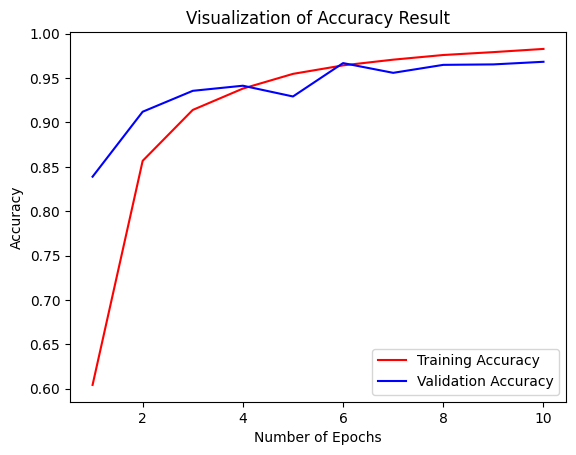

In [43]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 11)  # Adjust this if you trained for a different number of epochs

# Plot training and validation accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Add labels and title
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()

# Show the plot
plt.show()

In [45]:
class_names = validation_set.class_names

In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
# Make predictions on the test set
y_pred = cnn.predict(test_set)

# Get the predicted categories (indices of the maximum predicted values)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 211s 12ms/step


In [57]:
# Concatenate true categories from the test set
true_categories = tf.concat([y for _, y in test_set], axis=0)

# Get the true class indices (if the labels are one-hot encoded)
Y_true = tf.argmax(true_categories, axis=1)

In [59]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [61]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

In [69]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.92      0.99      0.95       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

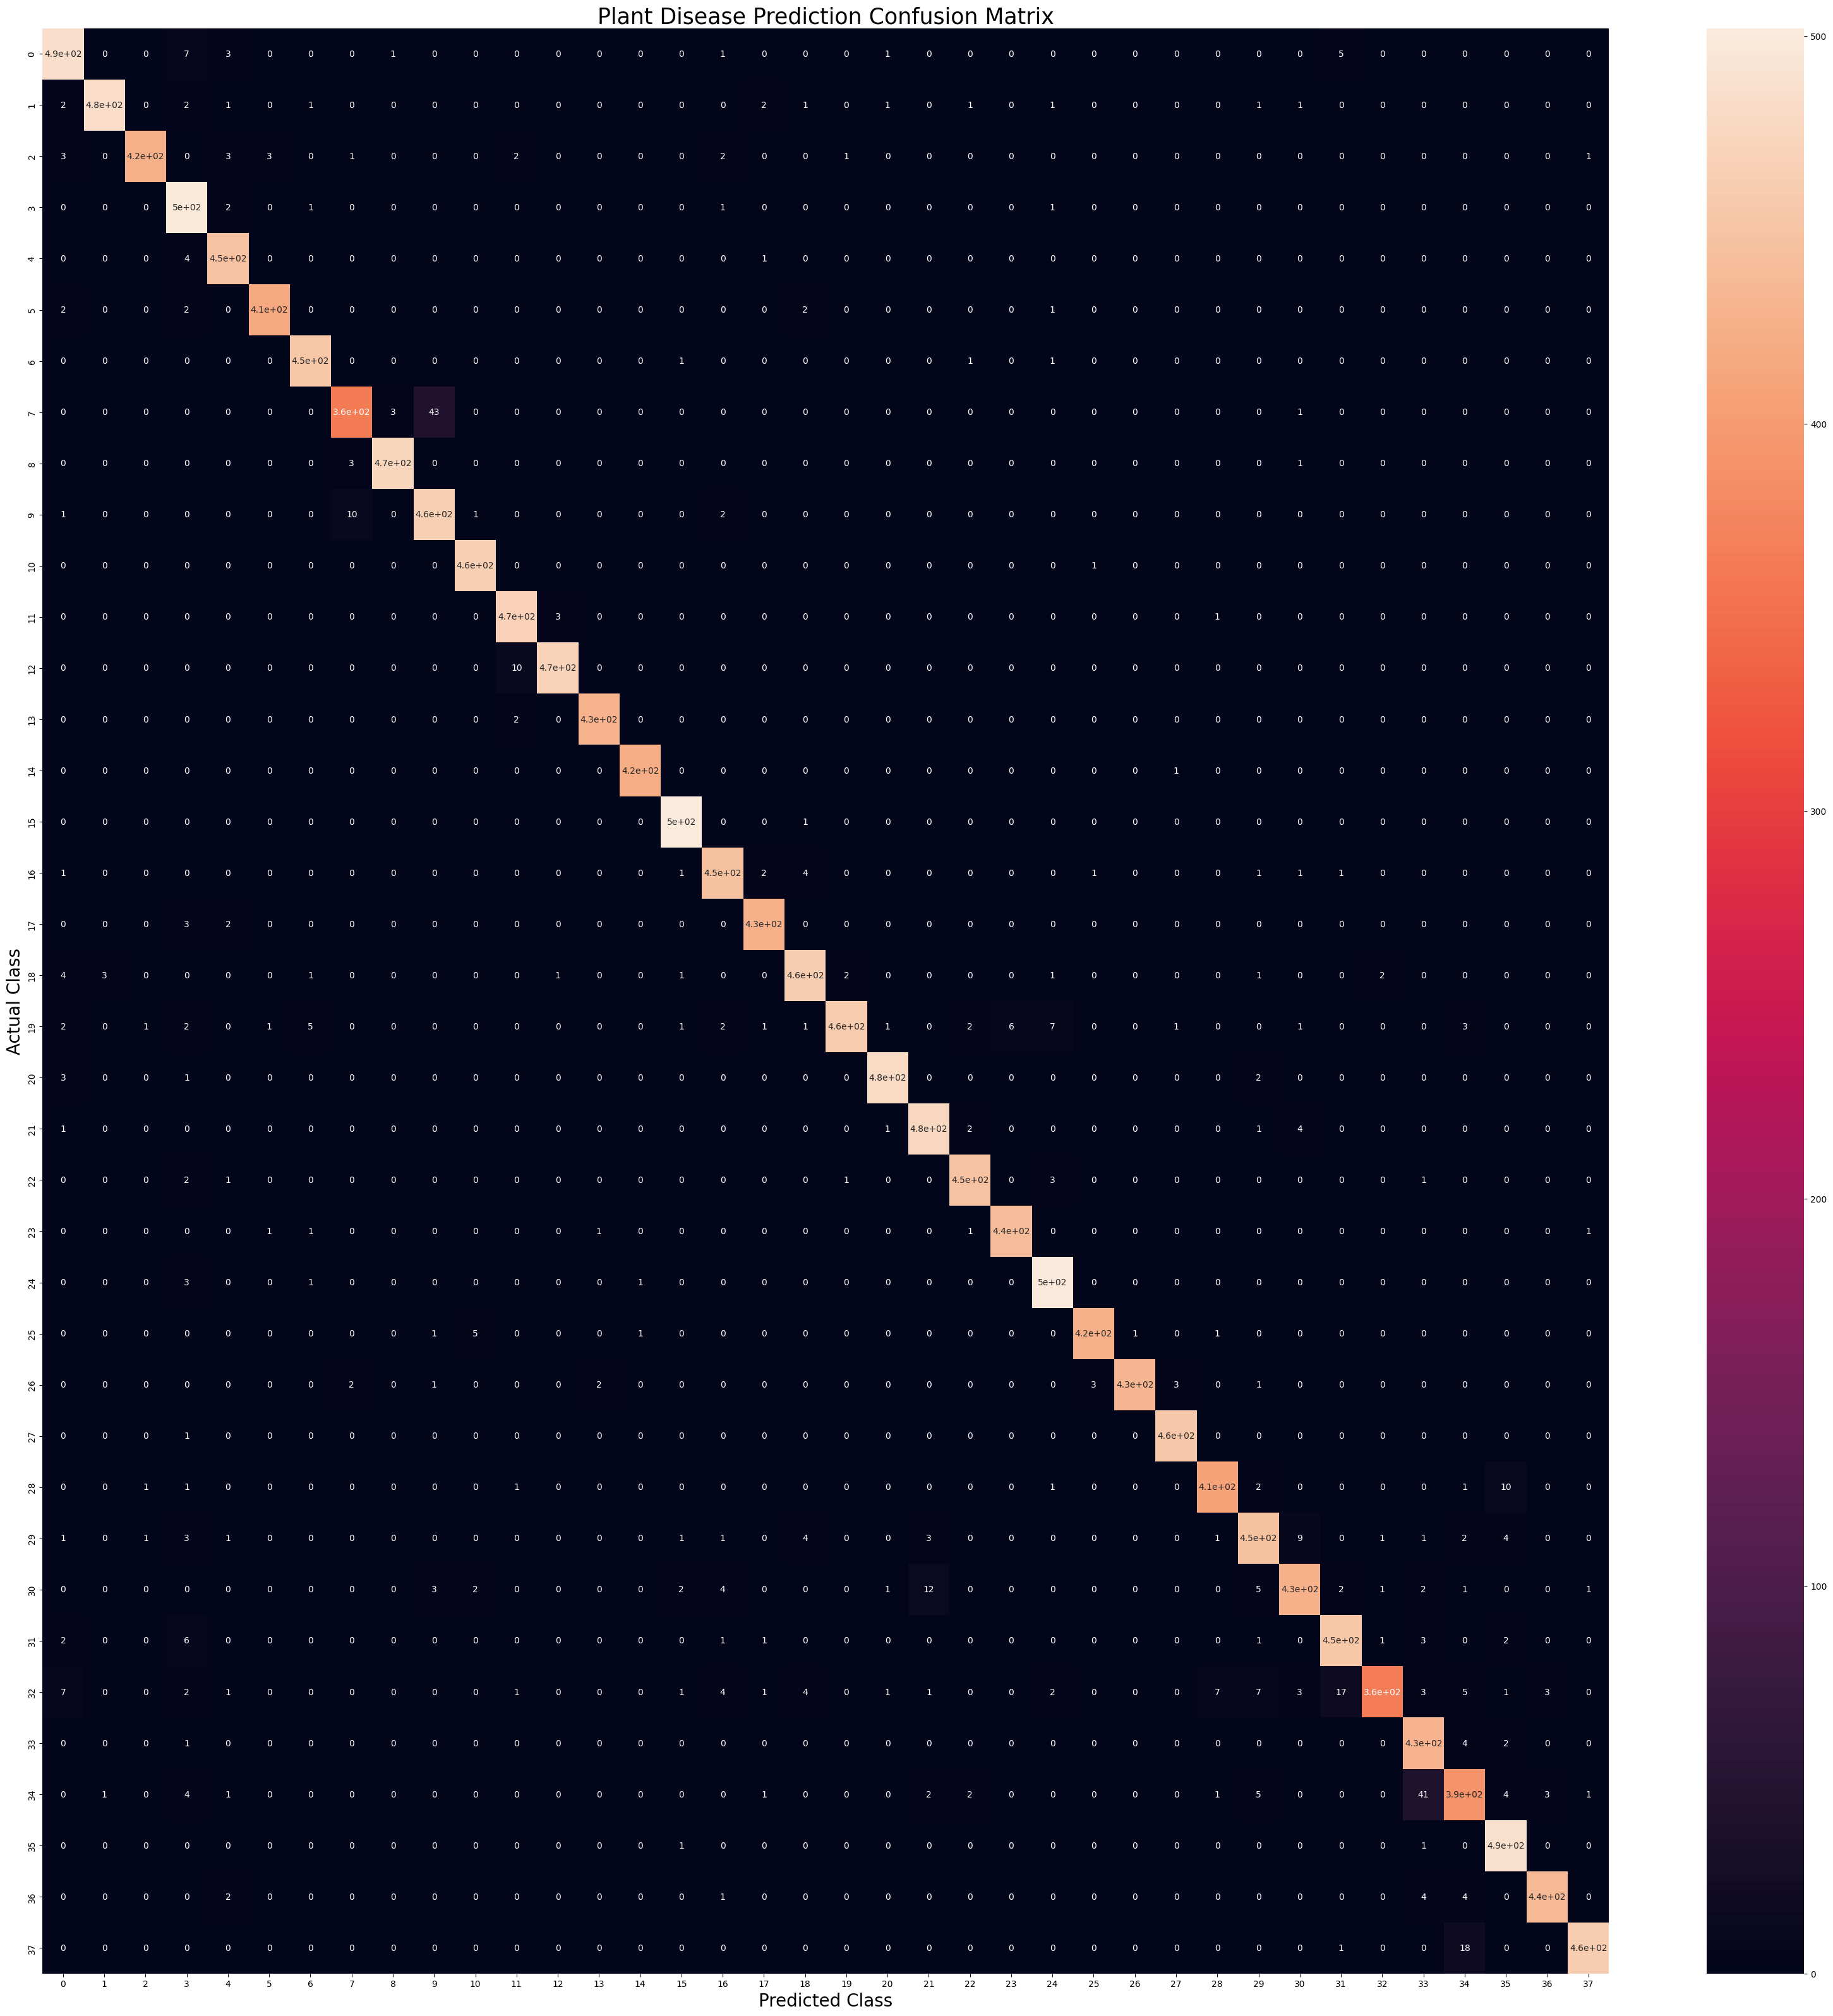

In [77]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()